In [1]:
import json

with open('cdn.json') as json_file:
    graph = json.load(json_file)

In [2]:
graph.keys()



dict_keys(['nodes', 'static_calls_i', 'static_calls_d', 'static_calls_u', 'cha_calls_i', 'cha_calls_d', 'cha_calls_u', 'macro_calls_i', 'macro_calls_d', 'macro_calls_u'])

In [3]:
_mappings_nodes = {}
for node in graph['nodes']:
    _mappings_nodes[node['id']] = node['attr']
    

In [4]:
graph['static_calls_i'][0]

{'src': 29543, 'tgts': [5212]}

In [5]:
_static_calls_successors_i = {}
_static_calls_successors_d = {}
_static_calls_successors_u = {}

for edge in graph['static_calls_i']:
    if edge['src'] not in _static_calls_successors_i:
        _static_calls_successors_i[edge['src']] = set()
    for tgt in edge['tgts']:
        _static_calls_successors_i[edge['src']].add(tgt)

for edge in graph['static_calls_d']:
    if edge['src'] not in _static_calls_successors_d:
        _static_calls_successors_d[edge['src']] = set()
    for tgt in edge['tgts']:
        _static_calls_successors_d[edge['src']].add(tgt)

for edge in graph['static_calls_u']:
    if edge['src'] not in _static_calls_successors_u:
        _static_calls_successors_u[edge['src']] = set()
    for tgt in edge['tgts']:
        _static_calls_successors_u[edge['src']].add(tgt)
        
_cha_calls_successors_i = {}
_cha_calls_successors_d = {}
_cha_calls_successors_u = {}

for edge in graph['cha_calls_i']:
    if edge['src'] not in _cha_calls_successors_i:
        _cha_calls_successors_i[edge['src']] = set()
    for tgt in edge['tgts']:
        _cha_calls_successors_i[edge['src']].add(tgt)
        
for edge in graph['cha_calls_d']:
    if edge['src'] not in _cha_calls_successors_d:
        _cha_calls_successors_d[edge['src']] = set()
    for tgt in edge['tgts']:
        _cha_calls_successors_d[edge['src']].add(tgt)
        
for edge in graph['cha_calls_u']:
    if edge['src'] not in _cha_calls_successors_u:
        _cha_calls_successors_u[edge['src']] = set()
    for tgt in edge['tgts']:
        _cha_calls_successors_u[edge['src']].add(tgt)        
        
        
_macro_calls_successors_i = {}
_macro_calls_successors_d = {}
_macro_calls_successors_u = {}

for edge in graph['macro_calls_i']:
    if edge['src'] not in _macro_calls_successors_i:
        _macro_calls_successors_i[edge['src']] = set()
    for tgt in edge['tgts']:
        _macro_calls_successors_i[edge['src']].add(tgt) 

for edge in graph['macro_calls_d']:
    if edge['src'] not in _macro_calls_successors_d:
        _macro_calls_successors_d[edge['src']] = set()
    for tgt in edge['tgts']:
        _macro_calls_successors_d[edge['src']].add(tgt) 

for edge in graph['macro_calls_u']:
    if edge['src'] not in _macro_calls_successors_u:
        _macro_calls_successors_u[edge['src']] = set()
    for tgt in edge['tgts']:
        _macro_calls_successors_u[edge['src']].add(tgt)        
        


In [6]:
_successors_static_overall = {}
for edge in graph['static_calls_i']:
    if edge['src'] not in _successors_static_overall:
        _successors_static_overall[edge['src']] = set()
    for tgt in edge['tgts']:
        _successors_static_overall[edge['src']].add(tgt)

for edge in graph['static_calls_d']:
    if edge['src'] not in _successors_static_overall:
        _successors_static_overall[edge['src']] = set()
    for tgt in edge['tgts']:
        _successors_static_overall[edge['src']].add(tgt)
    
_successors_cha_overall = {}
for edge in graph['cha_calls_i']:
    if edge['src'] not in _successors_cha_overall:
        _successors_cha_overall[edge['src']] = set()
    for tgt in edge['tgts']:
        _successors_cha_overall[edge['src']].add(tgt)

for edge in graph['cha_calls_d']:
    if edge['src'] not in _successors_cha_overall:
        _successors_cha_overall[edge['src']] = set()
    for tgt in edge['tgts']:
        _successors_cha_overall[edge['src']].add(tgt) 
        
_successors_macro_overall = {}
for edge in graph['macro_calls_i']:
    if edge['src'] not in _successors_macro_overall:
        _successors_macro_overall[edge['src']] = set()
    for tgt in edge['tgts']:
        _successors_macro_overall[edge['src']].add(tgt)

for edge in graph['macro_calls_d']:
    if edge['src'] not in _successors_macro_overall:
        _successors_macro_overall[edge['src']] = set()
    for tgt in edge['tgts']:
        _successors_macro_overall[edge['src']].add(tgt) 

In [7]:
_dependents_static_overall = {}

for k,vs in _successors_static_overall.items():
    for v in vs:
        if v not in _dependents_static_overall:
            _dependents_static_overall[v] = set()
        _dependents_static_overall[v].add(k)
        

_dependents_cha_overall = {}
for k,vs in _successors_cha_overall.items():
    for v in vs:
        if v not in _dependents_cha_overall:
            _dependents_cha_overall[v] = set()
        _dependents_cha_overall[v].add(k)


_dependents_macro_overall = {}
for k,vs in _successors_macro_overall.items():
    for v in vs:
        if v not in _dependents_macro_overall:
            _dependents_macro_overall[v] = set()
        _dependents_macro_overall[v].add(k)


In [8]:
import collections

def freq(out_dict,in_dict):
    outdegrees = [len(x) for x in out_dict.values()]
    indegrees = [len(x) for x in in_dict.values()]
    freq_outdeg = collections.Counter(outdegrees)
    freq_indeg = collections.Counter(indegrees)
    return {"in": freq_indeg, "out": freq_outdeg}

ds_static_overall = freq(_successors_static_overall,_dependents_static_overall)
ds_cha_overall = freq(_successors_cha_overall,_dependents_cha_overall)
ds_macro_overall = freq(_successors_macro_overall,_dependents_macro_overall)


    

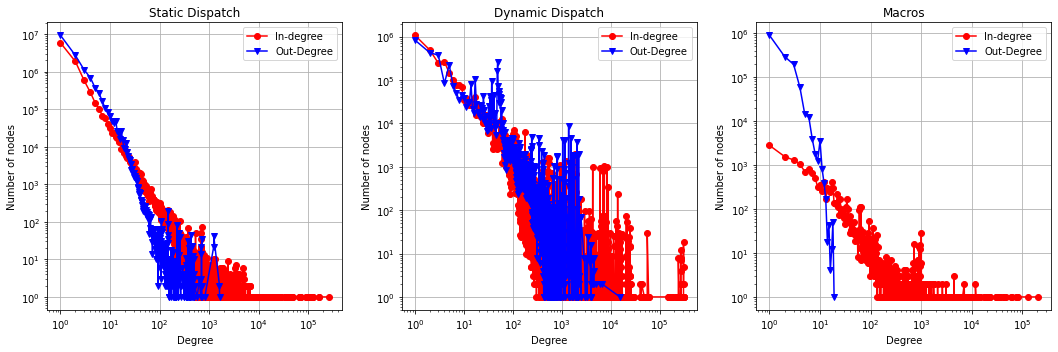

In [9]:
import matplotlib.pyplot as plt

def plot_degree(ds, title):
    od_indeg = collections.OrderedDict(sorted(ds['in'].items()))
    od_outdeg = collections.OrderedDict(sorted(ds['out'].items()))
    plt.grid(True)
    plt.loglog(list(od_indeg.keys()),list(od_indeg.values()),'ro-')
    plt.loglog(list(od_outdeg.keys()),list(od_outdeg.values()),'bv-')
    plt.legend(['In-degree', 'Out-Degree'])
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.title(title)
    
fig = plt.figure(figsize=(18,18))

plt.subplot(3, 3, 1)
plot_degree(ds_static_overall,"Static Dispatch")

plt.subplot(3, 3, 2)
plot_degree(ds_cha_overall,"Dynamic Dispatch")

plt.subplot(3, 3, 3)
plot_degree(ds_macro_overall,"Macros")


plt.savefig("degree-grid-overall.pdf")
plt.show() 

In [10]:
_dependents_static_downstream = {}

for k,vs in _static_calls_successors_d .items():
    for v in vs:
        if v not in _dependents_static_downstream:
            _dependents_static_downstream[v] = set()
        _dependents_static_downstream[v].add(k)
        

_dependents_cha_downstream = {}
for k,vs in _cha_calls_successors_d .items():
    for v in vs:
        if v not in _dependents_cha_downstream:
            _dependents_cha_downstream[v] = set()
        _dependents_cha_downstream[v].add(k)


_dependents_macro_downstream = {}
for k,vs in _macro_calls_successors_d .items():
    for v in vs:
        if v not in _dependents_macro_downstream:
            _dependents_macro_downstream[v] = set()
        _dependents_macro_downstream[v].add(k)

In [11]:
ds_static_down = freq(_static_calls_successors_d,_dependents_static_downstream)
ds_cha_down = freq(_cha_calls_successors_d,_dependents_cha_downstream)
ds_macro_down = freq(_macro_calls_successors_d,_dependents_macro_downstream)


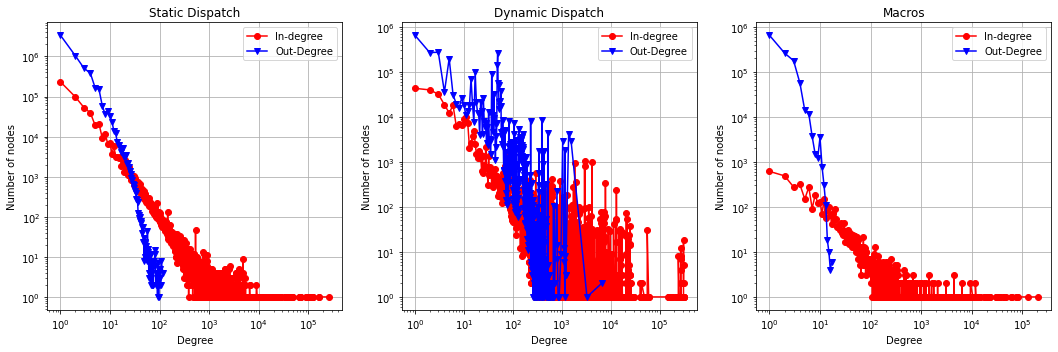

In [12]:
fig = plt.figure(figsize=(18,18))

plt.subplot(3, 3, 1)
plot_degree(ds_static_down,"Static Dispatch")

plt.subplot(3, 3, 2)
plot_degree(ds_cha_down,"Dynamic Dispatch")

plt.subplot(3, 3, 3)
plot_degree(ds_macro_down,"Macros")


plt.savefig("degree-grid-downstream.pdf")
plt.show() 

In [13]:
_dependents_static_upstream = {}

for k,vs in _static_calls_successors_u .items():
    for v in vs:
        if v not in _dependents_static_upstream:
            _dependents_static_upstream[v] = set()
        _dependents_static_upstream[v].add(k)
        

_dependents_cha_upstream = {}
for k,vs in _cha_calls_successors_u .items():
    for v in vs:
        if v not in _dependents_cha_upstream:
            _dependents_cha_upstream[v] = set()
        _dependents_cha_upstream[v].add(k)


_dependents_macro_upstream = {}
for k,vs in _macro_calls_successors_u .items():
    for v in vs:
        if v not in _dependents_macro_upstream:
            _dependents_macro_upstream[v] = set()
        _dependents_macro_upstream[v].add(k)

In [14]:
ds_static_up = freq(_static_calls_successors_u,_dependents_static_upstream)
ds_cha_up = freq(_cha_calls_successors_u,_dependents_cha_upstream)
ds_macro_up = freq(_macro_calls_successors_u,_dependents_macro_upstream)

In [24]:
_static_calls_successors_u

{7576808: {7576891},
 7576856: {7576831},
 7576880: {7576891},
 7576875: {7576891},
 7576818: {7576891},
 7576770: {7576891}}

In [30]:
_mappings_nodes[7576875]

{'def_id': 'juju::1.0.0::relation_list_by_id[0]',
 'acc': 'True',
 'loc': '23',
 'type': 'fn'}

In [26]:
_mappings_nodes[7576891]

{'def_id': 'charmhelpers::0.1.3::core[0]::hookenv[0]::log[0]',
 'acc': 'True',
 'loc': '10',
 'type': 'fn'}

In [29]:
import pandas as pd

outdegree_dict_static= {}
for i,(k,v) in enumerate(_successors_static_overall.items()):
    outdegree_dict_static[i] = [k, len(v)]

df_st = pd.DataFrame.from_dict(outdegree_dict_static, orient='index',columns=['nid',"outdegree"])

outdegree_dict_static= {}
for i,(k,v) in enumerate(_static_calls_successors_d.items()):
    outdegree_dict_static[i] = [k, len(v)]
df_st_d = pd.DataFrame.from_dict(outdegree_dict_static, orient='index',columns=['nid',"outdegree"])

In [32]:
df_st


,nid,outdegree
0,29543,17
1,29909,1
2,34975,1
3,20986,6
4,24637,1
...,...,...
15315930,44190631,3
15315931,44190633,2
15315932,44190641,9
15315933,44190642,3


In [43]:
df_down


,nid,outdegree
0,29543,16
1,14019,6
2,3490,4
3,7673,4
4,22243,1
...,...,...
5906052,44190640,17
5906053,44190637,4
5906054,44190642,3
5906055,44190636,4


In [44]:
df_down.loc[:,"outdegree"].median()

1.0

In [55]:
df_down.outdegree.quantile(0.99)

13.0

In [62]:
_mappings_nodes[6595073]['def_id']

'insta::0.12.0::content[0]::{{impl}}[6]::serialize[0]'

In [86]:
outdegree_dict_cha= {}
for i,(k,v) in enumerate(_successors_cha_overall.items()):
    outdegree_dict_cha[i] = [k, len(v)]

df_cha = pd.DataFrame.from_dict(outdegree_dict_cha, orient='index',columns=['nid',"outdegree"])

outdegree_dict_cha= {}
for i,(k,v) in enumerate(_cha_calls_successors_d.items()):
    outdegree_dict_cha[i] = [k, len(v)]

df_cha_d = pd.DataFrame.from_dict(outdegree_dict_cha, orient='index',columns=['nid',"outdegree"])

outdegree_dict_cha= {}
for i,(k,v) in enumerate(_cha_calls_successors_u.items()):
    outdegree_dict_cha[i] = [k, len(v)]

df_cha_u = pd.DataFrame.from_dict(outdegree_dict_cha, orient='index',columns=['nid',"outdegree"])




In [89]:
df_cha_u.outdegree.quantile(0.99)

3883.0

In [26]:
df_cha_d.outdegree.mean()

32.90874709225681

In [72]:
df_cha.nlargest(20, 'outdegree')

,nid,outdegree
456611,17967740,15460
447449,17586985,6597
447451,17586349,6597
1552107,4926241,6045
1552113,4926636,6045
1552245,5827506,4893
1552246,5819527,4893
1552269,40952337,4577
1552274,40943786,4577
1552300,5103041,4576


In [73]:
df_cha_d.nlargest(20, 'outdegree')

,nid,outdegree
1215454,17586985,6537
1215455,17586349,6537
1215456,17586040,3275
2928057,42193258,1549
2928058,42186704,1549
2928059,42191564,1549
2928060,42194638,1549
2928061,42188437,1549
2928062,42187783,1549
2928063,42187902,1549


In [20]:
_mappings_nodes[42192760]['def_id']

'webkit2gtk-webextension::0.7.0::auto[0]::dom_html_legend_element[0]::{{impl}}[34]::to_glib_none[0]'

In [44]:
df_cha_d[df_cha_d.outdegree > 1000]

,nid,outdegree
285072,6398754,1206
285101,6402446,1206
285136,6409255,1206
1215454,17586985,6537
1215455,17586349,6537
...,...,...
2979040,44029068,1162
2979054,44029631,1162
2979082,44031554,1157
2979221,41739881,1162


In [45]:
df_cha_d

,nid,outdegree
0,9906,49
1,25425,53
2,3490,50
3,28105,53
4,34975,4
...,...,...
2996305,44188398,1
2996306,6478495,2
2996307,6478729,1
2996308,44188491,2


In [46]:
df_cha_1000 = df_cha_d[df_cha_d.outdegree > 1000]

In [47]:
df_cha_1000

,nid,outdegree
285072,6398754,1206
285101,6402446,1206
285136,6409255,1206
1215454,17586985,6537
1215455,17586349,6537
...,...,...
2979040,44029068,1162
2979054,44029631,1162
2979082,44031554,1157
2979221,41739881,1162


In [69]:
called_packages = list()
for index, row in df_st_d.iterrows():
    for tid in _static_calls_successors_d[row['nid']]:
        called_packages.append(_mappings_nodes[tid]['def_id'].split("::")[0])

   
    

In [70]:
len(called_packages)

13319361

In [67]:
counter=collections.Counter(called_packages)

In [68]:
counter.most_common()

[('serde', 45282991),
 ('gtk', 11756192),
 ('serde_json', 10500531),
 ('gio', 8709045),
 ('gdk', 2177229),
 ('rustc-ap-serialize', 1923723),
 ('rustc-serialize', 1864578),
 ('pango', 1864151),
 ('glib', 1773383),
 ('diesel', 1515278),
 ('num-traits', 1233885),
 ('serde_urlencoded', 764439),
 ('gdk-pixbuf', 703009),
 ('toml', 682437),
 ('atk', 547637),
 ('cairo-rs', 359060),
 ('futures', 312347),
 ('nom', 298176),
 ('rustc-ap-syntax_pos', 268440),
 ('rand', 253096),
 ('serde_yaml', 202158),
 ('rustc-ap-rustc_data_structures', 197992),
 ('rustc-ap-rustc_errors', 188564),
 ('gc', 180124),
 ('bson', 170347),
 ('rustc-ap-rustc_target', 165816),
 ('erased-serde', 157616),
 ('thrift', 155649),
 ('bytecodec', 150408),
 ('syn', 119207),
 ('bincode', 115323),
 ('actix-router', 110107),
 ('typetag', 102575),
 ('chrono', 92412),
 ('glium', 90715),
 ('yup-oauth2', 88362),
 ('moore-vhdl-syntax', 86760),
 ('serde_qs', 81134),
 ('ssz', 80622),
 ('rustc-ap-rustc_span', 79484),
 ('serde_cbor', 77177),
 

In [73]:
outdegree_dict_m = {}
for i,(k,v) in enumerate(_successors_macro_overall.items()):
    outdegree_dict_m[i] = [k, len(v)]

df_m = pd.DataFrame.from_dict(outdegree_dict_m, orient='index',columns=['nid',"outdegree"])


outdegree_dict_m = {}
for i,(k,v) in enumerate(_macro_calls_successors_d.items()):
    outdegree_dict_m[i] = [k, len(v)]

df_m_d = pd.DataFrame.from_dict(outdegree_dict_m, orient='index',columns=['nid',"outdegree"])

df_m.outdegree.quantile(0.5)

In [80]:
df_m.outdegree.quantile(0.99)

6.0

In [75]:
df_m.outdegree.quantile(0.5)

1.0

In [76]:
df_m_d.outdegree.quantile(0.95)

4.0

In [77]:
df_m_d.outdegree.quantile(0.95).quantile(0.5)

1.0

In [79]:
df_m.outdegree.mean()

1.7263584585827367

In [81]:
called_packages = list()
for index, row in df_m_d.iterrows():
    for tid in _macro_calls_successors_d[row['nid']]:
        called_packages.append(_mappings_nodes[tid]['def_id'].split("::")[0])


In [82]:
len(called_packages)

2178547

In [83]:
counter=collections.Counter(called_packages)

In [84]:
counter.most_common()

[('log', 671618),
 ('nom', 308939),
 ('quote', 235647),
 ('bitflags', 192230),
 ('lazy_static', 190576),
 ('trackable', 69441),
 ('serde', 55058),
 ('slog', 49961),
 ('error-chain', 48428),
 ('glib', 21131),
 ('syn', 20877),
 ('failure', 20656),
 ('phf', 19778),
 ('synstructure', 14224),
 ('quick-error', 13858),
 ('stdweb', 13352),
 ('pest', 12414),
 ('serde_json', 10529),
 ('crunchy', 9976),
 ('diesel', 9090),
 ('enum_primitive', 8488),
 ('uint', 6979),
 ('tr', 6224),
 ('static_assertions', 5230),
 ('clap', 5079),
 ('cookie-factory', 4985),
 ('tracing', 4943),
 ('solana-metrics', 4877),
 ('futures', 4639),
 ('relm', 3980),
 ('cpp', 3883),
 ('newtype_derive', 3674),
 ('inventory', 3515),
 ('custom_derive', 3381),
 ('likely', 3335),
 ('sozu-command-lib', 3280),
 ('tract-core', 2949),
 ('anyhow', 2936),
 ('pmutil', 2665),
 ('gfx', 2607),
 ('pin-utils', 2447),
 ('bson', 2422),
 ('synom', 2271),
 ('fixed-hash', 2249),
 ('arrayref', 2173),
 ('futures-core', 2037),
 ('pidgin', 2008),
 ('juni

In [85]:
(671618+308939+235647+192230+190576+69441+55058+49961+48428)/2178547

0.8362904266008491

In [91]:
called_packages = list()
for index, row in df_cha_u.iterrows():
    for tid in _cha_calls_successors_u[row['nid']]:
        called_packages.append(_mappings_nodes[tid]['def_id'].split("::")[0])

In [92]:
len(called_packages)

160052888

In [93]:
counter=collections.Counter(called_packages)
counter.most_common()

[('webkit2gtk-webextension', 18923438),
 ('gtk', 6514613),
 ('astrolab-smart-coffee-types', 4281557),
 ('webkit2gtk', 3917584),
 ('rtdlib', 3726902),
 ('ommui_data', 3471705),
 ('languageserver-types', 1620647),
 ('lsp-types', 1405212),
 ('rustc-ap-syntax', 1329964),
 ('stripe-rust', 1182708),
 ('libstripe', 953244),
 ('google-compute1', 907803),
 ('serde_json', 841815),
 ('qapi-qmp', 836896),
 ('speedruns', 829403),
 ('isilon', 813600),
 ('gitlab', 792230),
 ('swf-tree', 772670),
 ('billecta', 703340),
 ('serde_test', 678109),
 ('rusoto_iot', 666351),
 ('google-content2', 614655),
 ('ciruela', 600580),
 ('libstorage', 596629),
 ('serenity', 576804),
 ('rustc-ap-rustc_data_structures', 576518),
 ('aws_lambda_events', 557159),
 ('transit_model', 552202),
 ('coinbase-pro-rs', 532968),
 ('rusoto_ssm', 515486),
 ('cfn', 515018),
 ('google-youtube3', 513002),
 ('swc_ecma_ast', 498547),
 ('google-dfareporting2d8', 485208),
 ('holochain_core_types', 468157),
 ('dropbox-sdk', 464800),
 ('bodhi

In [94]:
(18923438+6514613+428155+3917584+3726902+3471705+1620647+1405212+1182708)/160052888

0.257358455162646

In [104]:
df_cha_u.nlargest(2000, 'outdegree')

,nid,outdegree
86,25662,1003192
98,36950,944032
31,23197,794094
87,69,682411
179,13166,682411
...,...,...
5388,357124,6821
5389,357514,6821
5390,357245,6821
5391,356320,6821


In [103]:
_mappings_nodes[1012]['def_id']

'serde::1.0.106::ser[0]::impls[0]::{{impl}}[120]::serialize[0]'

In [105]:
df_cha_u.nlargest(2000, 'outdegree')

,nid,outdegree
86,25662,1003192
98,36950,944032
31,23197,794094
87,69,682411
179,13166,682411
...,...,...
5388,357124,6821
5389,357514,6821
5390,357245,6821
5391,356320,6821


In [108]:
called_packages = list()
for index, row in df_cha_u.iterrows():
    called_packages.append(_mappings_nodes[row['nid']]['def_id'].split("::")[0])

In [109]:
counter=collections.Counter(called_packages)
counter.most_common()

[('rustc-ap-serialize', 76211),
 ('serde', 34083),
 ('gtk', 24218),
 ('cranelift-codegen', 8201),
 ('diesel', 5994),
 ('serde_json', 5342),
 ('rustc-ap-syntax_pos', 4894),
 ('rustc-ap-rustc_data_structures', 4887),
 ('gio', 4093),
 ('syn', 2634),
 ('nalgebra', 2363),
 ('swc_ecma_ast', 2284),
 ('gluon_vm', 1982),
 ('rustc-serialize', 1679),
 ('alt_serde', 1631),
 ('cranelift-entity', 1589),
 ('rustc-ap-rustc_index', 1548),
 ('gdk', 1388),
 ('buffered-reader', 1374),
 ('toml', 1368),
 ('moore-svlog-syntax', 1328),
 ('moore-vhdl-syntax', 1284),
 ('wasmer-runtime-core', 1271),
 ('gstreamer', 1231),
 ('rayon', 1202),
 ('rustc-ap-rustc_errors', 1164),
 ('futures', 1161),
 ('opcua-types', 1149),
 ('proptest', 1147),
 ('futures-util', 1122),
 ('futures-util-preview', 1113),
 ('libp2p-core', 1084),
 ('tokio', 991),
 ('cgmath', 912),
 ('shred', 861),
 ('abomonation', 837),
 ('walrus', 825),
 ('cranelift-module', 794),
 ('combine', 789),
 ('moore-vhdl', 778),
 ('rustc-ap-syntax', 776),
 ('glib', 

In [189]:
indegree_dict_static = {}
for i,(k,v) in enumerate(_dependents_static_overall.items()):
    indegree_dict_static[i] = [k, len(v)]

df_indeg_static = pd.DataFrame.from_dict(indegree_dict_static, orient='index',columns=['nid',"indegree"])

indegree_dict_static = {}
for i,(k,v) in enumerate(_dependents_static_downstream.items()):
    indegree_dict_static[i] = [k, len(v)]

df_indeg_static_d = pd.DataFrame.from_dict(indegree_dict_static, orient='index',columns=['nid',"indegree"])

indegree_dict_cha = {}
for i,(k,v) in enumerate(_dependents_cha_overall.items()):
    indegree_dict_cha[i] = [k, len(v)]

df_indeg_cha = pd.DataFrame.from_dict(indegree_dict_cha, orient='index',columns=['nid',"indegree"])

indegree_dict_cha = {}
for i,(k,v) in enumerate(_dependents_cha_downstream.items()):
    indegree_dict_cha[i] = [k, len(v)]

df_indeg_cha_d = pd.DataFrame.from_dict(indegree_dict_cha, orient='index',columns=['nid',"indegree"])


indegree_dict_cha = {}
for i,(k,v) in enumerate(_dependents_macro_overall.items()):
    indegree_dict_cha[i] = [k, len(v)]

df_indeg_macro = pd.DataFrame.from_dict(indegree_dict_cha, orient='index',columns=['nid',"indegree"])

indegree_dict_cha = {}
for i,(k,v) in enumerate(_dependents_macro_downstream.items()):
    indegree_dict_cha[i] = [k, len(v)]

df_indeg_macro_d = pd.DataFrame.from_dict(indegree_dict_cha, orient='index',columns=['nid',"indegree"])



In [197]:
df_indeg_macro_d.indegree.quantile(0.99)

6433.290000000001

In [196]:
df_indeg_macro_d.indegree.mean()

391.9659949622166

In [124]:
_mappings_nodes[1057430]['def_id']

'trackable::0.2.23::{{impl}}[5]::new[0]'

In [125]:
≈

,nid,indegree
78379,15453,264281
93,7476,162747
90,10190,162061
184014,1861552,125287
11378,25734,123205
4024484,1862139,118710
300550,6555,110110
78377,18445,108628
130532,34219,105673
130531,19840,105503


In [127]:
df_st.nlargest(20, 'outdegree')

,nid,outdegree
2582966,11836871,1625
2579717,11826854,1621
2581356,11831271,1621
9575139,38305306,1243
9575147,38309450,1243
9577628,38222749,1243
9577630,38221238,1243
9590065,38042245,1243
9590072,38043210,1243
9592554,38395876,1243


In [131]:
_successors_static_overall[11836871]

{11837446,
 11837447,
 11837455,
 11837466,
 11837467,
 11837475,
 11837478,
 11837479,
 11837489,
 11837500,
 11837503,
 11837509,
 11837510,
 11837526,
 11837534,
 11837535,
 11837536,
 11837538,
 11837545,
 11837547,
 11837550,
 11837552,
 11837555,
 11837556,
 11837566,
 11837571,
 11837573,
 11837577,
 11837580,
 11837582,
 11837589,
 11837595,
 11837609,
 11837615,
 11837616,
 11837617,
 11837623,
 11837629,
 11837630,
 11837634,
 11837635,
 11837637,
 11837639,
 11837644,
 11837649,
 11837653,
 11837655,
 11837659,
 11837661,
 11837664,
 11837667,
 11837677,
 11837682,
 11837686,
 11837688,
 11837689,
 11837691,
 11837694,
 11837696,
 11837698,
 11837699,
 11837701,
 11837703,
 11837705,
 11837707,
 11837712,
 11837716,
 11837722,
 11837726,
 11837728,
 11837734,
 11837744,
 11837746,
 11837749,
 11837751,
 11837752,
 11837755,
 11837758,
 11837768,
 11837773,
 11837783,
 11837795,
 11837802,
 11837805,
 11837811,
 11837814,
 11837826,
 11837833,
 11837838,
 11837839,
 11837841,

In [132]:
_mappings_nodes[11837446]['def_id']

'epoxy::0.1.0::BindVertexBuffer[0]::load_with[0]'

In [133]:
_mappings_nodes[11837580]['def_id']

'epoxy::0.1.0::TexStorage1D[0]::load_with[0]'

In [137]:
_mappings_nodes[11836871]['def_id']

'epoxy::0.1.0::load_with[0]'

In [136]:
fn_name = set()
for r in _successors_static_overall[11836871]:
    fn_name.add(_mappings_nodes[r]['def_id'].split("::")[-1])

fn_name

{'load_with[0]'}

In [198]:
df_indeg_macro_d.nlargest(20, 'indegree')

,nid,indegree
0,1996,205810
2,9767,132067
1,37997,80998
73,11584,77848
74,13929,75438
21,31528,64161
3,20021,61480
1224,1056063,47648
237,5688,43063
149,689805,41910


In [205]:
_mappings_nodes[20021]['def_id']

'log::0.4.8::macros[0]::trace[0]'

In [206]:
_mappings_nodes[0]

{'def_id': 'num-traits::0.2.11::pow[0]::{{impl}}[160]::pow[0]',
 'acc': 'True',
 'loc': '3',
 'type': 'fn'}

In [212]:
import numpy as np
loc_dist = []
for n in _mappings_nodes.values():
    if int(n['loc']) > 0:
        loc_dist.append(int(n['loc']))

        


In [214]:
len(loc_dist)

39773334

In [ ]:
plt.hist(loc_dist, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show()